## Recurrence, Depth and High-dimensional data
# Keras ANN notebook

In this notebook we introduce the MNIST dataset, and present basic methods to setup and train a *artificial neural network (ANN)* with the Keras package.

The following elements will be presented:

* MNIST dataset
* data pre-processing: size reduction, scaling
* shallow ann: setup and training 
* loss and accuracy graphs
* optimizer options: learning rate
* object-oriented interface
* deep ann: setup and training
* generating network architecture graphs

**References:**
* THE MNIST DATABASE of handwritten digits(http://yann.lecun.com/exdb/mnist/)
* [Are we there yet?](http://rodrigob.github.io/are_we_there_yet/build/)
* [Keras](https://keras.io/): The Python Deep Learning library
* Getting started with the Keras [functional API](https://keras.io/getting-started/functional-api-guide/)
* Getting started with the Keras Sequential model ([object oriented](https://keras.io/getting-started/sequential-model-guide/))
* Keras [model visualization](https://keras.io/visualization/)
* An [overview](http://sebastianruder.com/optimizing-gradient-descent/) of gradient descent optimization algorithms
* [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)
* colah's [blog](http://colah.github.io/)

*Please execute the cell bellow in order to initialize the notebook environment*

In [135]:
%autosave 0
%matplotlib inline
# %matplotlib notebook

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mod3

plt.rcParams.update({'figure.figsize': (5.0, 4.0), 'lines.linewidth': 2.0})

Autosave disabled


## MNIST dataset

The MNIST dataset has the following properties:
* fixed-size images of handwritten digits
* images are size-normalized and centered
* training set of 60,000 samples, test set of 10,000 samples
* test samples are from different writters

The MNIST dataset has enough complexity to apply key machine learning concepts while not being too computationaly intensive to train. 

**EXERCISE 1**

The Keras framework provides access to several popular datasets, with the module `keras.datasets`. The MNIST dataset is loaded as follows:
```
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

Load the MNIST dataset and review its basic properties


**INSTRUCTIONS**
* load the MNIST dataset with `mnist.load_data()`
* print the shapes of `x_train`, `y_train`, `x_test` and `y_test`
* plot a few random samples from the training set using `plt.imshow(img, cmap=plt.cm.gray)`
* plot the distribution of pixel values in the train set

In [136]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [137]:
print(np.shape(x_train), np.shape(x_test), np.shape(y_train), np.shape(y_test))

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


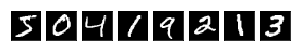

In [138]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(x_train[i, :, :], cmap = plt.cm.gray)

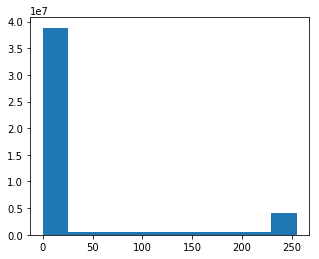

In [139]:
plt.hist(x_train.flatten())
plt.show()

**EXPECTED OUTPUT**
```
[Dataset properties]
train set data shape: (60000, 28, 28)
train set label shape: (60000,)
test set data shape: (10000, 28, 28)
test set label shape: (10000,)

[Sample properties]
label: 5
shape: (28, 28)
min: 0
max: 255
```
<img src="fig/keras_ann_mnist.png" style="width:90%;height:90%;display:inline;margin:1px">
<img src="fig/keras_ann_mnist_hist.png" style="width:50%;height:50%;display:inline;margin:1px">

### Data pre-processing

**EXERCISE 2**

Several pre-processing steps should take place before training the MNIST dataset.

* reduce pixel count by factor of 4, in order to train the dataset on CPU
* scale pixel intensities between 0 and 1

**INSTRUCTIONS**
* drop one in every two pixels with smart indexing kung-fu 
* scale pixel intensities between 0 and 1
* print the shapes of `x_train`, `y_train`, `x_test` and `y_test`
* plot a few samples
* plot the distribution of the pixel values in the train set

In [140]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 14, 14) (10000, 14, 14)


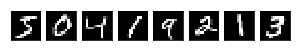

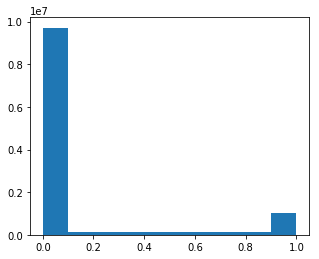

In [141]:
x_train = x_train[:, ::2, ::2]
x_test = x_test[:, ::2, ::2]
x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train) + 1e-10)
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test) + 1e-10)
print(x_train.shape, x_test.shape)

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(x_train[i, :, :], cmap = plt.cm.gray)

plt.figure()
plt.hist(x_train.flatten())
plt.show()

**EXPECTED OUTPUT**
```
train set shape: (60000, 14, 14)
test set shape: (60000, 14, 14)
```
<img src="fig/keras_ann_mnist_small.png" style="width:90%;height:90%;display:inline;margin:1px">
<img src="fig/keras_ann_mnist_hist_scaled.png" style="width:50%;height:50%;display:inline;margin:1px">

## Shallow ANN

<img src="fig/keras_ann_shallow_schema.png" style="width:50%;height:50%;display:inline;margin:1px">

### Adapting dataset format for ANN encoding

As shown in the graph above, the inputs to the ANN are arranged as a vector of pixels, and the outputs are arranged as a vector of labels. The outputs are encoded as *1-out-of-n*, where all units are $0$ except for the unit corresponding to the class, i.e. label $2$ is encoded as $(0, 0, 1, 0, 0, 0, 0, 0, 0, 0)$.

**INSTRUCTIONS**
* use function `keras.utils.to_categorical()` to transform the labels to *1-out-of-n* encoding
* transform the samples to the required shape with smart indexing kung-fu

In [142]:
import keras
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 196) (10000, 196) (60000, 10) (10000, 10)


**EXPECTED OUTPUT**
```
train set data shape: (60000, 196)
train set label shape: (10,)
test set data shape: (10000, 196)
test set label shape: (10,)
```

### Network setup

Setting up a shallow ANN uses the following elements:

* `keras.layersInput()` sets the input
* `keras.layersDense()` adds a fully connected layer
* `keras.models.Model()` defines the ANN model
* `compile()` method of `keras.models.Model` implements the ANN in Tensorflow
* `summary()` method of `keras.models.Model` prints the ANN structure

In [155]:
input_train_shape = (x_train.shape[1],)

In [156]:
from keras.layers import Input, Dense
from keras.models import Model

n_out = 10
n_fc1 = 256

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               50432     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 53,002.0
Trainable params: 53,002.0
Non-trainable params: 0.0
_________________________________________________________________


**EXPECTED OUTPUT**
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               50432     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
=================================================================
Total params: 53,002.0
Trainable params: 53,002.0
Non-trainable params: 0.0
```

### Network train

The ANN is trained by calling the method `fit()` and specifying the train set. The trained model is evaluated by calling the method `evaluate()` and the specifying test set.

The default named parameters of the `fit()` method are the following:
* `batch_size=32`
* `epochs=1`
* `verbose=1`
* `shuffle=True`

In [144]:
input_train, labels_train = x_train, y_train
input_test, labels_test = x_test, y_test

In [145]:
history = model.fit(input_train, labels_train)

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Train parameters]')
for item in history.params:
    print(item+':', history.params[item])
print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

Epoch 1/1
60000/60000 [==============================] - 5s - loss: 0.0972 - acc: 0.1237     

[Train parameters]
metrics: ['loss', 'acc']
samples: 60000
batch_size: 32
epochs: 1
do_validation: False
verbose: 1

[Model evaluation]
test loss 0.0896741866827
test acc 0.172


**EXPECTED OUTPUT**
```
Epoch 1/1
60000/60000 [==============================] - 4s - loss: 0.0864 - acc: 0.3356     

[Train parameters]
metrics: ['loss', 'acc']
samples: 60000
batch_size: 32
epochs: 1
do_validation: False
verbose: 1

[Model evaluation]
test loss 0.0709026087403
test acc 0.4896
```

### Changing default train parameters

Retrain the ANN under the following conditions:

* 5 training epochs
* batch size of 128

**INSTRUCTIONS**
* Call the `fit()` method with relevant names parameters.

In [146]:
history = model.fit(input_train, labels_train, epochs=5, batch_size=128)

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Train parameters]')
for item in history.params:
    print(item+':', history.params[item])
print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.0897 - acc: 0.1669     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.0896 - acc: 0.1764     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.0895 - acc: 0.1864     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.0894 - acc: 0.1955     
Epoch 5/5
60000/60000 [==============================] - 2s - loss: 0.0893 - acc: 0.2018     

[Train parameters]
metrics: ['loss', 'acc']
samples: 60000
batch_size: 128
epochs: 5
do_validation: False
verbose: 1

[Model evaluation]
test loss 0.0891860014796
test acc 0.2146


**EXPECTED OUTPUT**
```
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.0692 - acc: 0.5123     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.0656 - acc: 0.5555     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0623 - acc: 0.5889     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0594 - acc: 0.6194     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0568 - acc: 0.6465     

[Train parameters]
metrics: ['loss', 'acc']
samples: 60000
batch_size: 128
epochs: 5
do_validation: False
verbose: 1

[Model evaluation]
test loss 0.0551402773798
test acc 0.6666
```

## Resetting the weights

You might have noticed that the ANN keeps updating its weights with each call to the `fit()` method.
Resetting the network requires to redefine its structure and compiling.

**INSTRUCTIONS**
* Redefine the network, compile and train
* compare the performance of 1 epoch vs 5 epochs training

In [149]:
from keras.layers import Input, Dense
from keras.models import Model

n_out = 10
n_fc1 = 256

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.summary()

history = model.fit(input_train, labels_train, epochs=20, batch_size=128)

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Train parameters]')
for item in history.params:
    print(item+':', history.params[item])
print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               50432     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 53,002.0
Trainable params: 53,002.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 2s - loss: 0.1173 - acc: 0.1130     
Epoch 2/20
60000/60000 [==============================] - 2s - loss: 0.0910 - acc: 0.1276     
Epoch 3/20
60000/60000 [==============================] - 2s - loss: 0.0899 - acc: 0.1425     
Epoch 4/20
60000/60000 [==============================] - 2s - loss: 0.0896 - acc: 0.1539     
Epoch 5/20
60000

### Changing the learning rate $\eta$

Changing the learning rate $eta$ requires creating an optimizer instance,
and passing it to the relevant optimizer option:
```
from keras import optimizers
sgd = optimizers.SGD(lr=2)
```

**INSTRUCTIONS**
* create an optimizer instance, set $\eta=2$, and pass it to the `compile()` method
* retrain network for 5 epochs

In [152]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

n_out = 10
n_fc1 = 256

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

sgd = optimizers.SGD(lr=2)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
model.summary()

history = model.fit(input_train, labels_train, epochs=5, batch_size=128)

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Train parameters]')
for item in history.params:
    print(item+':', history.params[item])
print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               50432     
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 53,002.0
Trainable params: 53,002.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 2s - loss: 0.0754 - acc: 0.4768     
Epoch 2/5
60000/60000 [==============================] - 2s - loss: 0.0450 - acc: 0.7791     
Epoch 3/5
60000/60000 [==============================] - 2s - loss: 0.0342 - acc: 0.8392     
Epoch 4/5
60000/60000 [==============================] - 2s - loss: 0.0295 - acc: 0.8575     
Epoch 5/5
60000/6000

**EXPECTED OUTPUT**
```
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.0311 - acc: 0.8160     
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.0167 - acc: 0.9106     
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.0142 - acc: 0.9233     
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.0129 - acc: 0.9309     
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.0122 - acc: 0.9337     

[Model evaluation]
test loss 0.0118559889253
test acc 0.9342
```

### Visualizing loss and accuracy

### Loss and accuracy visualisation (Tensorboard)

Open up a terminal and start a TensorBoard server that will read logs stored at `/tmp/autoencoder`.

`tensorboard --logdir=/tmp/ann`

This allows us to monitor training in the TensorBoard web interface at http://127.0.0.1:6006

In [227]:
from keras.callbacks import TensorBoard

from keras import optimizers

n_out = 10
n_fc1 = 256
n_epochs = 5
n_batch_size = 128
eta = 2

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

sgd = optimizers.SGD(lr=eta)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

history = model.fit(input_train, labels_train,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(input_test, labels_test),
                    verbose=0,
                    callbacks=[TensorBoard(log_dir='/tmp/ann')])

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])


[Model evaluation]
test loss 0.0251014585733
test acc 0.8793


**EXPECTED OUTPUT**

<img src="fig/tensorboard_ann_1.png" style="display:inline;margin:1px"><img src="fig/tensorboard_ann_2.png" style="display:inline;margin:1px">
<img src="fig/tensorboard_ann_3.png" style="display:inline;margin:1px"><img src="fig/tensorboard_ann_4.png" style="display:inline;margin:1px">

### Loss and accuracy visualisation

We also provide you with visualization code but first set the training loop correctly. The `fit()` function only trains over at least 1 epoch, and we need it to train over a fractions of epoch to visualise the intermediate results

**INSTRUCTIONS**
* use the code below to set the training loop

In [225]:
n = 50
n_epochs = 2
n_eval = 0.2
n_chunk = int(n_eval*n)

indexes = np.arange(n)
for epoch in range(n_epochs):
#     np.random.shuffle(indexes)
    for chunk in [indexes[i:i+n_chunk] for i in range(0, n, n_chunk)]:
        print(chunk)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


**EXPECTED OUTPUT**
```
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
```

Once that is done, insert your loop below

**INSTRUCTIONS**
* insert your training loop below

In [260]:
%matplotlib notebook

<IPython.core.display.Javascript object>


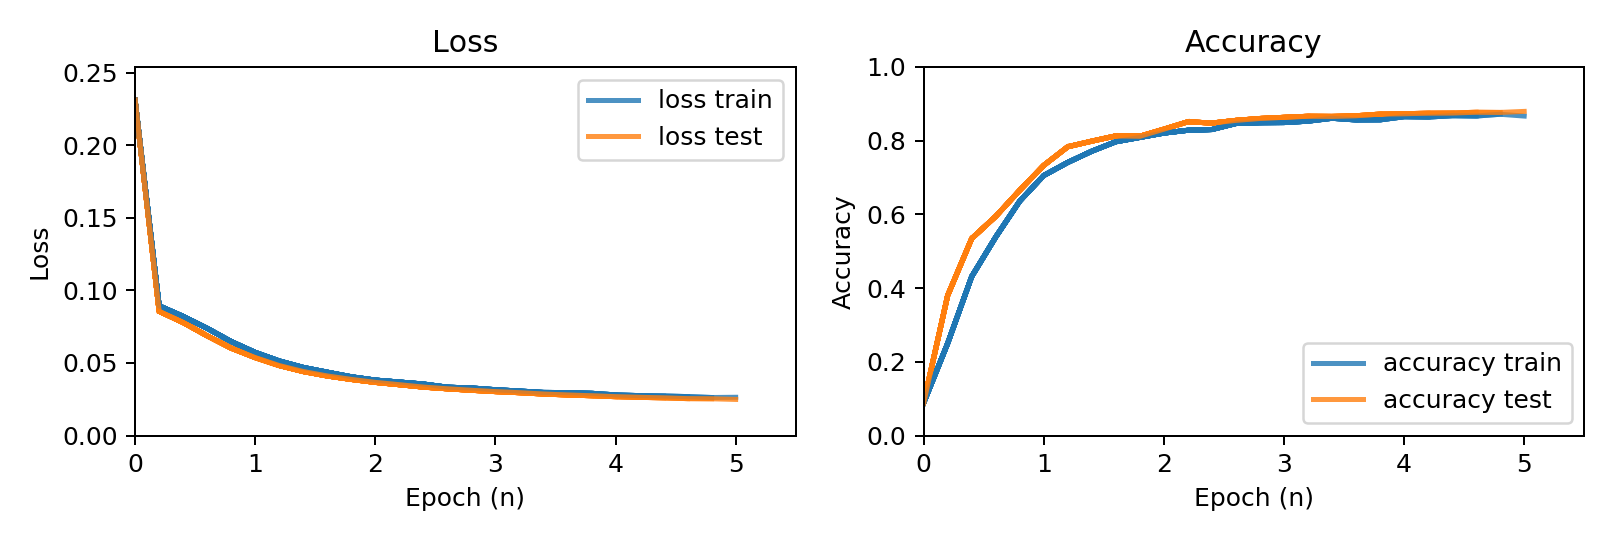


[Model evaluation]
test loss 0.024842969352
test acc 0.8795


In [262]:
# setup network
n_out = 10
n_fc1 = 256
n_epochs = 5
n_batch_size = 128
eta = 2
n = input_train.shape[0]
n_eval = 0.2
n_chunk = int(n_eval*n)

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

sgd = optimizers.SGD(lr=eta)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

evaluate_train = model.evaluate(input_train, labels_train, verbose=0)
evaluate_test = model.evaluate(input_test, labels_test, verbose=0)

loss_train = [evaluate_train[0]]
loss_test = [evaluate_test[0]]
accuracy_train = [evaluate_train[1]]
accuracy_test = [evaluate_test[1]]

x_range = [0]

fig=plt.figure(figsize=(9, 3))

gs = gridspec.GridSpec(1, 2)

fig1 = plt.subplot(gs[0])
plt.plot(x_range, loss_train, 'C0', alpha=0.8, label='loss train')
plt.plot(x_range, loss_test, 'C1', alpha=0.8, label='loss test')

plt.ylim([0, max(loss_train[0], loss_test[0])*1.1])
plt.xlim([0, n_epochs*1.1])
plt.title('Loss')
plt.xlabel('Epoch (n)')
plt.ylabel('Loss')
plt.legend()

fig2 = plt.subplot(gs[1])
plt.plot(x_range, accuracy_train, 'C0', alpha=0.8, label='accuracy train')
plt.plot(x_range, accuracy_test, 'C1', alpha=0.8, label='accuracy test')

plt.ylim([0, 1])
plt.xlim([0, n_epochs*1.1])
plt.title('Accuracy')
plt.xlabel('Epoch (n)')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
fig.show()
fig.canvas.draw()

indexes = np.arange(n)
for epoch in range(n_epochs):
    np.random.shuffle(indexes)
    for chunk in [indexes[i:i+n_chunk] for i in range(0, n, n_chunk)]:
        history = model.fit(input_train[chunk, :], labels_train[chunk, :], 
                            epochs=1, batch_size=n_batch_size, verbose = 0)
        evaluate_test = model.evaluate(input_test, labels_test, verbose=0)
        
        loss_train += history.history["loss"]
        accuracy_train += history.history["acc"]

        loss_test += [evaluate_test[0]]
        accuracy_test += [evaluate_test[1]]
        
        x_range += [x_range[-1] + len(chunk) / n_chunk * n_eval]


        fig1.plot(x_range, loss_train, 'C0', alpha=0.8, label='loss train')
        fig1.plot(x_range, loss_test, 'C1', alpha=0.8, label='loss test')

        fig2.plot(x_range, accuracy_train, 'C0', alpha=0.8, label='accuracy train')
        fig2.plot(x_range, accuracy_test, 'C1', alpha=0.8, label='accuracy test')

        fig.canvas.draw()
        
evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

In [263]:
%matplotlib inline

**EXPECTED OUTPUT**
<img src="fig/ann_keras_plot_custom.png">

**EXPECTED OUTPUT**
```
[Model evaluation]
test loss 0.0247837326184
test acc 0.8787
```

### Object oriented interface

There is also an object oriented (OO) interface, as you can see in the exemple below.

In [249]:
from keras import optimizers
from keras.models import Sequential

# setup network
n_out = 10
n_fc1 = 256
n_epochs = 5
n_batch_size = 128
eta = 2

model = Sequential()
from keras.layers import Dense, Activation

model.add(Dense(units=n_fc1, input_dim=input_train_shape[0]))
model.add(Activation('sigmoid'))
model.add(Dense(units=n_out))
model.add(Activation('sigmoid'))

sgd = optimizers.SGD(lr=eta)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               50432     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 53,002.0
Trainable params: 53,002.0
Non-trainable params: 0.0
_________________________________________________________________


## Deep ANN

<img src="fig/keras_ann_deep_schema.png" style="width:50%;height:50%;display:inline;margin:1px">

### Network setup and train

Adding more layers to the network is done by stacking layers before the output layer.

**INSTRUCTIONS**
* Add two additional fully connected layers to the ANN
* set layer size to 64
* set batch size to 32 and $\eta$ to 3
* retrain with  batch size of 128 and observe the difference in performance

In [207]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers

n_out = 10
n_fc1 = 256

input_layer = Input(shape=(input_train_shape), name='input')
x = Dense(n_fc1, activation='sigmoid', name='fc_1')(input_layer)
x = Dense(64, activation='sigmoid', name='fc_2')(x)
x = Dense(64, activation='sigmoid', name='fc_3')(x)
output_layer = Dense(n_out, activation='sigmoid', name='output')(x)

sgd = optimizers.SGD(lr=3)

model = Model(input_layer, output_layer)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
model.summary()

history = model.fit(input_train, labels_train, epochs=5, batch_size=32)

evaluation = model.evaluate(input_test, labels_test, verbose=0)

print('\n[Train parameters]')
for item in history.params:
    print(item+':', history.params[item])
print('\n[Model evaluation]')
print('test', history.params['metrics'][0], evaluation[0])
print('test', history.params['metrics'][1], evaluation[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 256)               50432     
_________________________________________________________________
fc_2 (Dense)                 (None, 64)                16448     
_________________________________________________________________
fc_3 (Dense)                 (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 71,690.0
Trainable params: 71,690.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.0898 - acc: 0.1368     
Epoch 2/5
60000/60000 [===============

**EXPECTED OUTPUT (with batch size = 32)**
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input (InputLayer)           (None, 196)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 64)                12608     
_________________________________________________________________
fc_2 (Dense)                 (None, 64)                4160      
_________________________________________________________________
fc_3 (Dense)                 (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 10)                650       
=================================================================
Total params: 21,578.0
Trainable params: 21,578.0
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 3s - loss: 0.0901 - acc: 0.1224     
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.0765 - acc: 0.3522     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.0396 - acc: 0.7501     
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.0239 - acc: 0.8580     
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.0187 - acc: 0.8847     

[Model evaluation]
test loss 0.0165417414045
test acc 0.8971
```

## Do you MNIST me?

Let's do a competition for training MNIST. Any changes are accepted under the following 

**CCNSS MNIST competition manifesto **
We abide to the the rules of training MNIST under the following conditions:
* results are reported by averaging 5 training sessions
* only SGD with momentum optimizer is accepted
* training set is reduced to the fist 20,000 samples

**INSTRUCTIONS**
* build from the code below that already implements the restrictions to the competition
* adapt as seen fit

```
sgd = optimizers.SGD(lr=eta, decay=1e-6, momentum=0.9)

input_train_comptetition = input_train[:20000]
labels_train_competition = labels_train[:20000]
```

In [293]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import optimizers

In [ ]:
def run():
    n_out = 10
    n_fc1 = 256
    n_epochs = 15
    n_batch_size = 128
    eta = 2

    input_train_competition = input_train[:20000]
    labels_train_competition = labels_train[:20000]

    input_layer = Input(shape=(input_train_shape), name='input')
    x = Dense(n_fc1, activation='relu', name='fc_1')(input_layer)
#     x = Dropout(0.2)(x)
#     x = Dense(256, activation='relu', name='fc_2')(x)
#     x = Dropout(0.2)(x)
    # x = Dense(64, activation='relu', name='fc_3')(x)
    
    output_layer = Dense(n_out, activation='softmax', name='output')(x)

#     sgd = optimizers.SGD(lr=eta, decay = 0.1)
    sgd = optimizers.SGD(lr=eta)
    
#     keras.regularizers.l2(0.1)
    model = Model(input_layer, output_layer)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    history = model.fit(input_train_competition , labels_train_competition,
                        epochs=n_epochs,
                        batch_size=n_batch_size)

    evaluation = model.evaluate(input_test, labels_test, verbose=0)

    print('\n[Model evaluation]')
    print('test', history.params['metrics'][0], evaluation[0])
    print('test', history.params['metrics'][1], evaluation[1])
    return evaluation[1]

np.mean([run() for i in range(5)]) 

Epoch 1/15
20000/20000 [==============================] - 1s - loss: 0.5846 - acc: 0.8150     
Epoch 2/15
20000/20000 [==============================] - 0s - loss: 0.1953 - acc: 0.9406     
Epoch 3/15
20000/20000 [==============================] - 0s - loss: 0.1345 - acc: 0.9591     
Epoch 4/15
20000/20000 [==============================] - 0s - loss: 0.0961 - acc: 0.9708     
Epoch 5/15
20000/20000 [==============================] - 0s - loss: 0.0779 - acc: 0.9764     
Epoch 6/15
20000/20000 [==============================] - 0s - loss: 0.0646 - acc: 0.9804     
Epoch 7/15
20000/20000 [==============================] - 0s - loss: 0.0538 - acc: 0.9840     
Epoch 8/15
20000/20000 [==============================] - 0s - loss: 0.0391 - acc: 0.9890     
Epoch 9/15
20000/20000 [==============================] - 0s - loss: 0.0327 - acc: 0.9911     
Epoch 10/15
20000/20000 [==============================] - 0s - loss: 0.0267 - acc: 0.9931     
Epoch 11/15
20000/20000 [========================

## Generating network architecture graphs

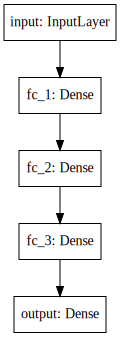

In [273]:
from IPython.display import display, SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

# setup network
n_w1 = 64
lr = 3.

input_img = Input(shape=input_train_shape, name='input')

x = Dense(n_w1, activation='sigmoid', name='fc_1')(input_img)
x = Dense(n_w1, activation='sigmoid', name='fc_2')(x)
x = Dense(n_w1, activation='sigmoid', name='fc_3')(x)
output = Dense(n_out, activation='sigmoid', name='output')(x)

sgd = optimizers.SGD(lr=lr)
model = Model(input_img, output)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

# save model graph
plot_model(model, to_file='ann_deep.png')

# plot model graph
display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

**EXPECTED OUTPUT**
<img src="fig/ann_deep.png">

**EXTENDED EXERCISE 1**

Examine the effect of scaling the input scamples between 0 and 1, in addition to other typical pre-processing options, such as scaling the samples to $\mu=0$ and $\sigma=1$ both pixel-wise and image-wise.